In [1]:
#importing the neccessary packages
import mysql.connector
from mysql.connector import connect
from getpass import getpass
import pandas as pd
import numpy as np
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split

In [2]:
#Reading the file
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
#Standardize header names
#1. user lower case
customer_df.columns = customer_df.columns.str.lower()
#2.renaming
customer_df.rename(columns={'employmentstatus': 'employment status'}, inplace = True)
#3.removing spaces and adding underscore
customer_df.columns = customer_df.columns.map(lambda x: x.replace(" ","_"))

In [4]:
#Changing "effective_to_date" column to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [5]:
customer_df['effective_to_month'] = pd.DatetimeIndex(customer_df['effective_to_date'])

In [6]:
#The columns that are categorical:
categorical = customer_df.select_dtypes(include=object)

#Deleting the customer_id column
categorical = categorical.drop('customer',axis=1)


### 1.Open the categoricals variable we created before.

In [7]:
categorical

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [8]:
categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2.Plot all the categorical variables with the proper plot. What can you see?

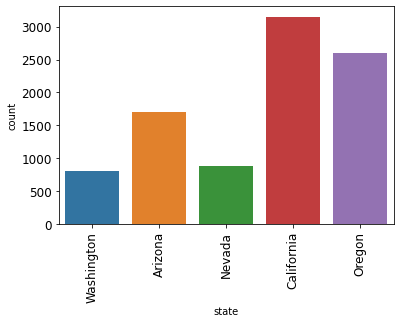

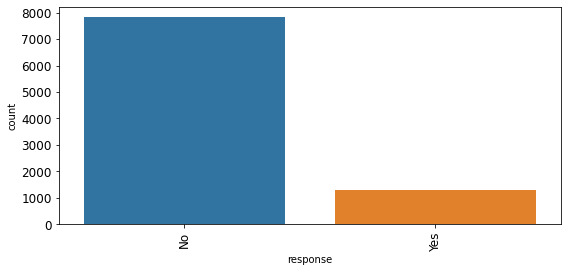

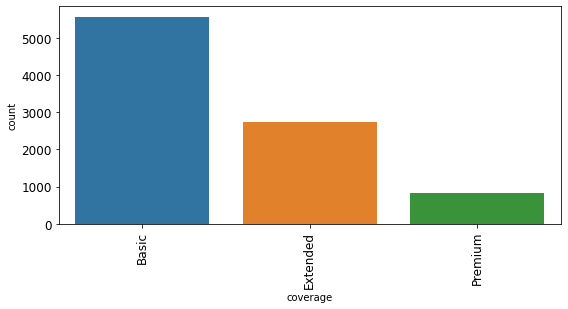

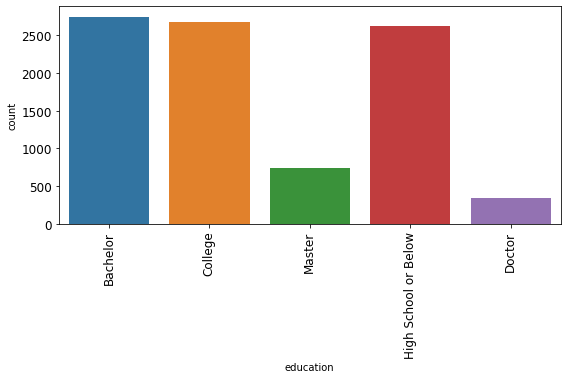

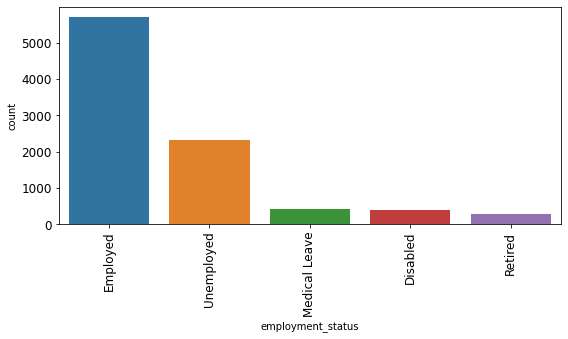

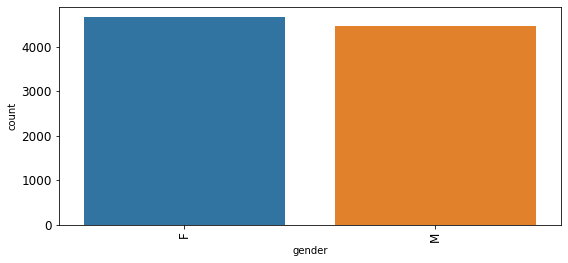

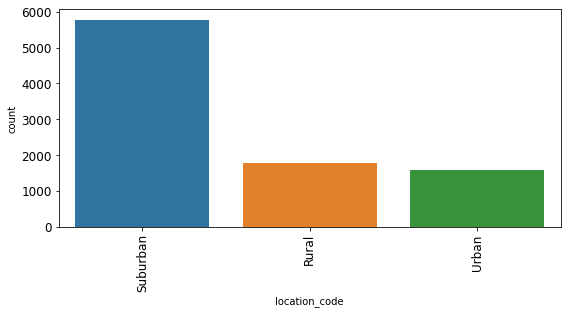

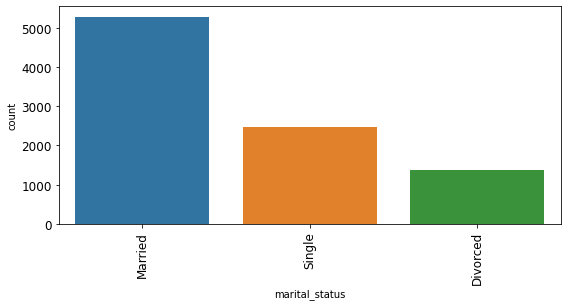

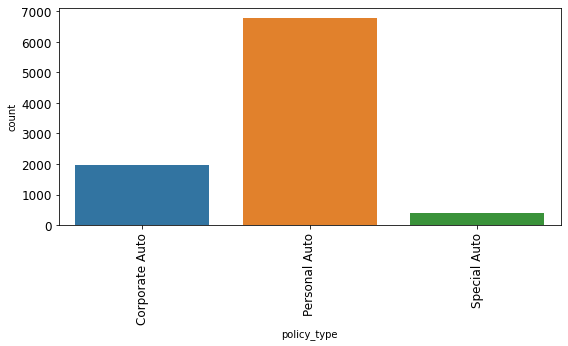

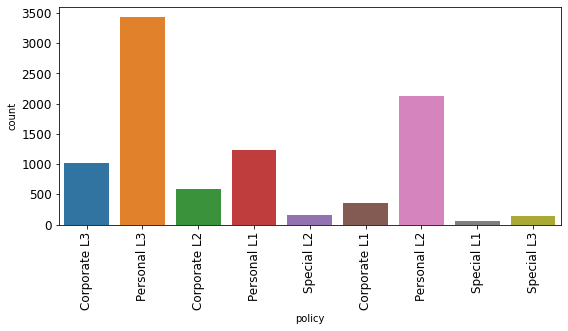

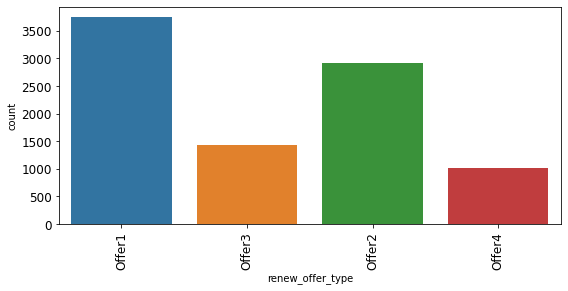

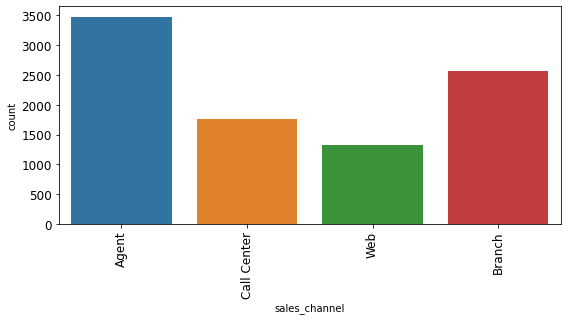

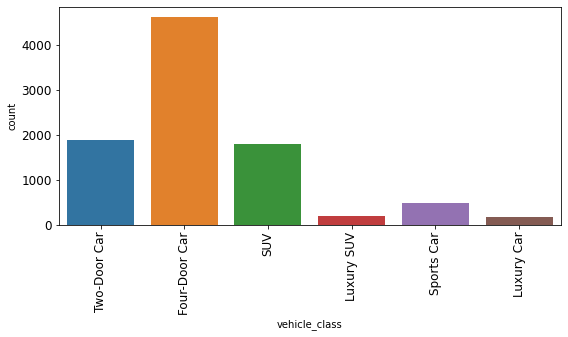

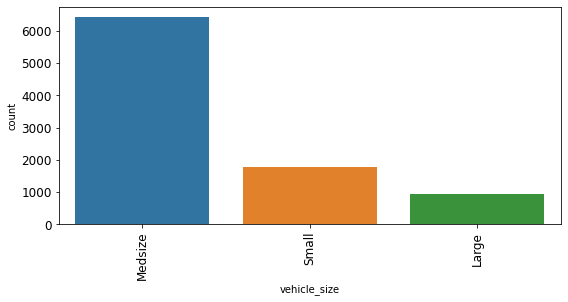

In [9]:
for i, col in enumerate(categorical.columns):
    plt.figure(i)
    
    plt.rcParams["figure.figsize"] = (9, 4)
    plt.rcParams["xtick.labelsize"] = 12
    plt.rcParams["ytick.labelsize"] = 12
    chart = sns.countplot(x=col, data=categorical)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90) 

##### As expected, we see the count of records by each categorical variable. The insights are the same as in the previous lab. 

### 3.There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [10]:
#Deleting the policy column
customer_df = customer_df.drop('policy',axis=1) # dropping this as we already have "policy_type" and this doesn't add much value. 

In [11]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employment_status              9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

### 4.Plot time variable. Can you extract something from it?

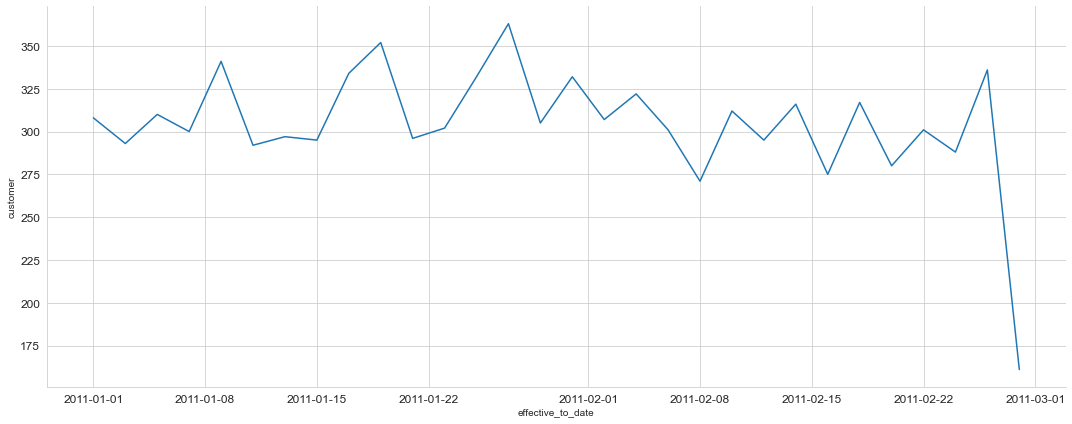

In [12]:
customer_df1 = customer_df.groupby(pd.Grouper(key='effective_to_date', axis=0, 
                      freq='2D', sort=True)).count()

sns.set_style("whitegrid")
sns.relplot(
    data=customer_df1, x="effective_to_date", y = 'customer',
    kind="line", height=6, aspect=2.5)

##### Here we see the count of customers by "Effective to date". We see that we have most customers with Effective to Date in January 2011, since the peaks are in that month.

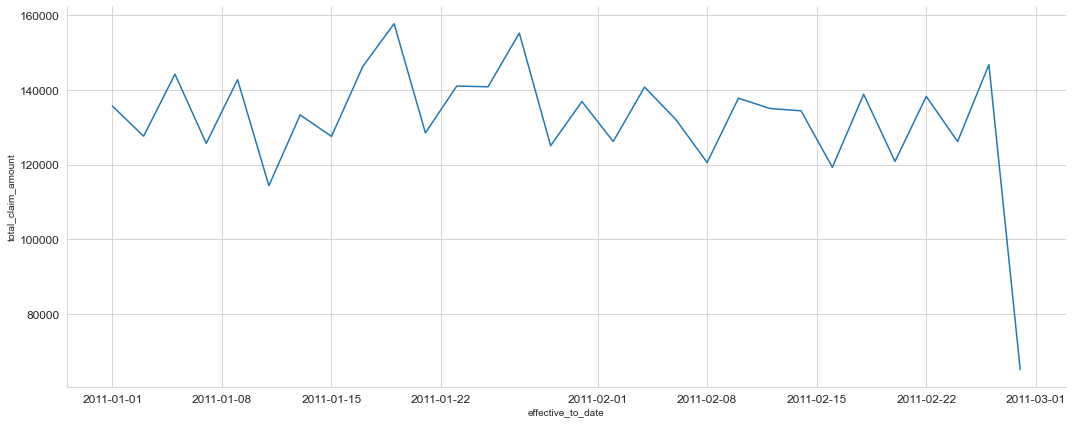

In [14]:
customer_df2 = customer_df.groupby(pd.Grouper(key='effective_to_date', axis=0, 
                      freq='2D', sort=True)).sum()

sns.set_style("whitegrid")
sns.relplot(
    data=customer_df2, x="effective_to_date", y = 'total_claim_amount',
    kind="line", height=6, aspect=2.5)

##### Here we see the Total CLaim Amount by "Effective to Date". Here we also see that we have a peak in January 2011, and then a drop in the previous level. 

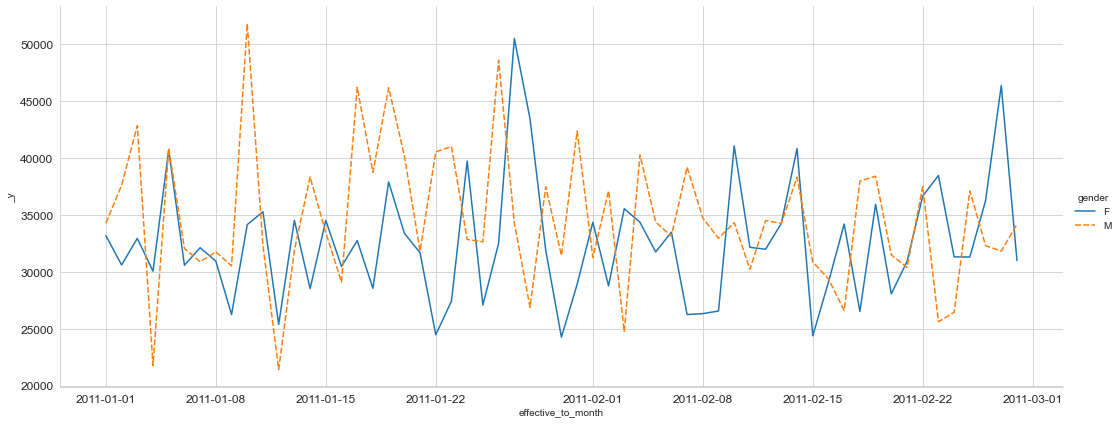

In [13]:
total_claim_amounts = customer_df.pivot_table(index="effective_to_month", columns="gender", values="total_claim_amount" , aggfunc='sum' )
sns.set_style("whitegrid")
sns.relplot(data=total_claim_amounts, kind="line",height=6, aspect=2.5)

##### Here we are comparing the Total Claim Amount by "Effective to Date" broken down by Gender. We see that the amount for Male were higher until around Januaru 2011. After this, amounts for Male drop and the amounts for Female customers start increasing.